Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading a csv file

In [2]:
df = pd.read_csv('downloads/books.csv')

Number of rows and columns

In [3]:
df.shape

(399, 24)

Number of books that do not have an original title

In [5]:
missing_original_titles_count = df['original_title'].count()
print(f'Number of books without orignal title: {missing_original_titles_count}')

Number of books without orignal title: 363


In [6]:
df.describe

<bound method NDFrame.describe of      book_id  goodreads_book_id  best_book_id   work_id  books_count  \
0         15              48855         48855   3532896          710   
1         40              19501         19501   3352398          185   
2         81               7445          7445   2944133           92   
3         82               1845          1845   3284484          108   
4         87               1617          1617    265616          109   
..       ...                ...           ...       ...          ...   
394     9788           23399022      23399022  42955411           21   
395     9847           20685373      20685373  40000267           18   
396     9887             503248        503248    491309           21   
397     9960             127970        127970   1066433           26   
398     9968             554674        554674    548132           34   

           isbn        isbn13  \
0     553296981  9.780553e+12   
1     143038419  9.780143e+12   
2 

Number of unique books present in the dataset

In [26]:
df = df[df['original_title'].notnull()]
unique_books_count = df['book_id'].nunique()
print(f'Number of unique books (after removing null values in original_title) : {unique_books_count}')

Number of unique books (after removing null values in original_title) : 363


In [27]:
average_rating = df['average_rating'].mean()
print(f'The average rating of all the books in the dataset : {average_rating:.2f}')

The average rating of all the books in the dataset : 3.99


In [28]:
books_published_2000 = df[df['original_publication_year'] == 2000].shape[0]

print("Number of books published in the year 2000:", books_published_2000)


Number of books published in the year 2000: 7


In [11]:
max_ratings_book = df[df['work_ratings_count'] == df['work_ratings_count'].max()]
max_ratings_title = max_ratings_book['title'].values[0]
print(f'Book with maximum number of ratings: "{max_ratings_title}"')

Book with maximum number of ratings: "The Diary of a Young Girl"


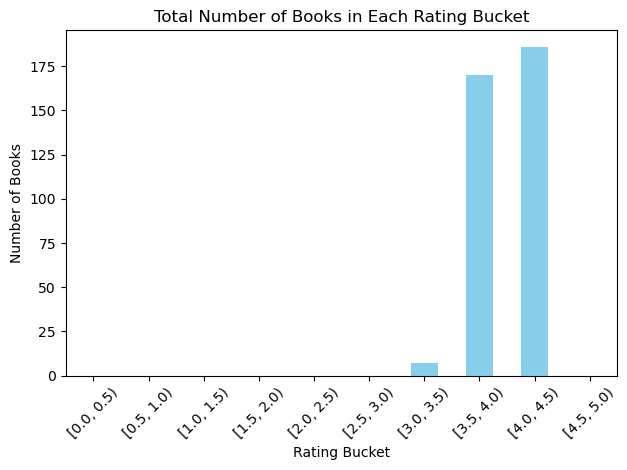

In [9]:
buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
df['rating_bucket'] = pd.cut(df['average_rating'], bins=buckets, right=False)
books_in_buckets = df.groupby('rating_bucket').size()

books_in_buckets.plot(kind='bar', color='skyblue')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Total Number of Books in Each Rating Bucket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()